In [9]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')
import netCDF4 as nc
import cmocean as cm
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

sys.path.append('/data/tjarniko/mocsy')
import arrow
sys.path.append('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
import CCCma_fwk as Cfwk
from matplotlib import reload
import arrow
import glob

%matplotlib inline

In [10]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## find a month worth of profiles from a spot, average them in space, time, get std devs

## do the same for the PI case

## plot them


    jan 1 - jan 31
    march 1 - march 31
    july 1-july 31

In [13]:


w2 = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/PI_3rd_2015/ncs/SKOG_1d_20151227_20151231_ptrc_T_20151230-20151230.nc')
prof_depth = w2.variables['deptht'][:]

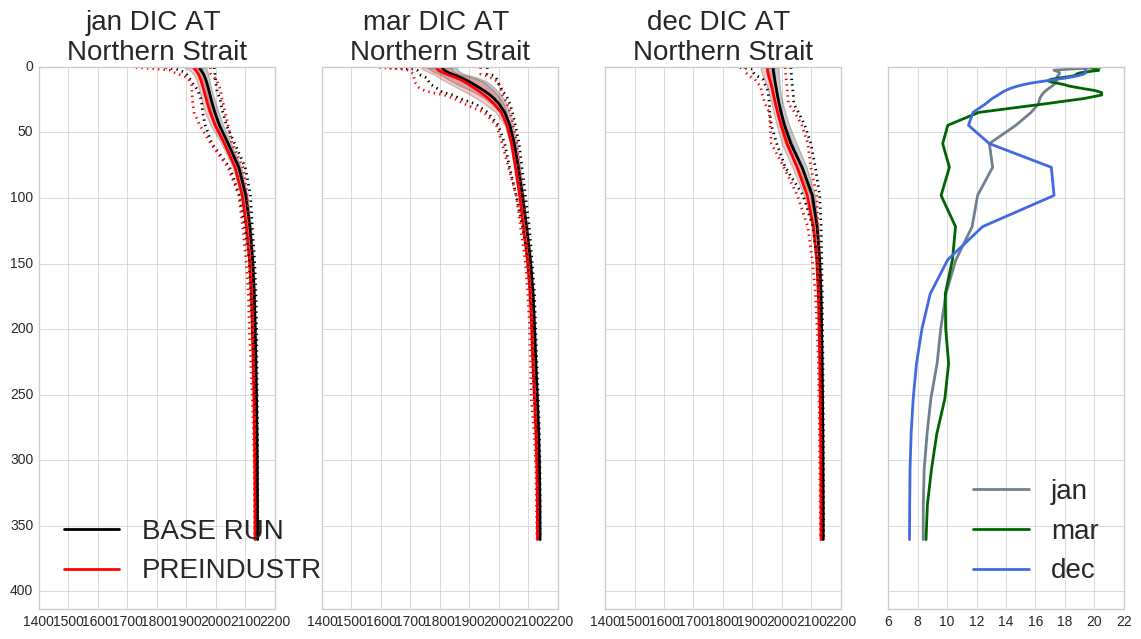

In [19]:
tstn = 'NS'
mon1 = 'jan'
mon2 = 'mar'
mon3 = 'dec'

xmin = 1400
xmax = 2200
ymin = 0
ymax = 414





fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ncname = './pibr/' + mon1 + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
DIC_BR_stor = w['ncoutput']['DIC_BR_stor'][:]
DIC_PI_stor = w['ncoutput']['DIC_PI_stor'][:]
TA_BR_stor = w['ncoutput']['TA_BR_stor'][:]
TA_PI_stor = w['ncoutput']['TA_PI_stor'][:]
temp_BR_stor = w['ncoutput']['temp_BR_stor'][:]
temp_PI_stor = w['ncoutput']['temp_PI_stor'][:]
sal_BR_stor = w['ncoutput']['sal_BR_stor'][:]
sal_PI_stor = w['ncoutput']['sal_PI_stor'][:]

t_stn_DIC_BR = DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
t_stn_DIC_PI = DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

t_stn_DIC_BR_mean = np.zeros(40)
t_stn_DIC_PI_mean = np.zeros(40)
t_stn_DIC_BR_std = np.zeros(40)
t_stn_DIC_PI_std = np.zeros(40)
t_stn_DIC_BR_max = np.zeros(40)
t_stn_DIC_PI_max = np.zeros(40)
t_stn_DIC_BR_min = np.zeros(40)
t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    t_stn_DIC_PI_min[i] = np.nanmin(t_PI)

mon1diff = t_stn_DIC_BR_mean-t_stn_DIC_PI_mean

ax.invert_yaxis()
ax.plot(t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,t_stn_DIC_BR_mean-t_stn_DIC_BR_std,t_stn_DIC_BR_mean+t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax.plot(t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,t_stn_DIC_PI_mean-t_stn_DIC_PI_std,t_stn_DIC_PI_mean+t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax.plot(t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymax,ymin])
ax.set_title(mon1 + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 20, loc = 'best')
#ax2.invert_yaxis()

ncname = './pibr/' + mon2 + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
DIC_BR_stor = w['ncoutput']['DIC_BR_stor'][:]
DIC_PI_stor = w['ncoutput']['DIC_PI_stor'][:]
TA_BR_stor = w['ncoutput']['TA_BR_stor'][:]
TA_PI_stor = w['ncoutput']['TA_PI_stor'][:]
temp_BR_stor = w['ncoutput']['temp_BR_stor'][:]
temp_PI_stor = w['ncoutput']['temp_PI_stor'][:]
sal_BR_stor = w['ncoutput']['sal_BR_stor'][:]
sal_PI_stor = w['ncoutput']['sal_PI_stor'][:]

t_stn_DIC_BR = DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
t_stn_DIC_PI = DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

t_stn_DIC_BR_mean = np.zeros(40)
t_stn_DIC_PI_mean = np.zeros(40)
t_stn_DIC_BR_std = np.zeros(40)
t_stn_DIC_PI_std = np.zeros(40)
t_stn_DIC_BR_max = np.zeros(40)
t_stn_DIC_PI_max = np.zeros(40)
t_stn_DIC_BR_min = np.zeros(40)
t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    t_stn_DIC_PI_min[i] = np.nanmin(t_PI)

mon2diff = t_stn_DIC_BR_mean-t_stn_DIC_PI_mean

ax2.invert_yaxis()
ax2.plot(t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax2.fill_betweenx(prof_depth,t_stn_DIC_BR_mean-t_stn_DIC_BR_std,t_stn_DIC_BR_mean+t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax2.plot(t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax2.fill_betweenx(prof_depth,t_stn_DIC_PI_mean-t_stn_DIC_PI_std,t_stn_DIC_PI_mean+t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax2.plot(t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymax,ymin])
ax2.set_title(mon2 + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax3

ncname = './pibr/' + mon3 + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
DIC_BR_stor = w['ncoutput']['DIC_BR_stor'][:]
DIC_PI_stor = w['ncoutput']['DIC_PI_stor'][:]
TA_BR_stor = w['ncoutput']['TA_BR_stor'][:]
TA_PI_stor = w['ncoutput']['TA_PI_stor'][:]
temp_BR_stor = w['ncoutput']['temp_BR_stor'][:]
temp_PI_stor = w['ncoutput']['temp_PI_stor'][:]
sal_BR_stor = w['ncoutput']['sal_BR_stor'][:]
sal_PI_stor = w['ncoutput']['sal_PI_stor'][:]

t_stn_DIC_BR = DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
t_stn_DIC_PI = DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

t_stn_DIC_BR_mean = np.zeros(40)
t_stn_DIC_PI_mean = np.zeros(40)
t_stn_DIC_BR_std = np.zeros(40)
t_stn_DIC_PI_std = np.zeros(40)
t_stn_DIC_BR_max = np.zeros(40)
t_stn_DIC_PI_max = np.zeros(40)
t_stn_DIC_BR_min = np.zeros(40)
t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    t_stn_DIC_PI_min[i] = np.nanmin(t_PI)

mon3diff = t_stn_DIC_BR_mean-t_stn_DIC_PI_mean

ax3.invert_yaxis()
ax3.plot(t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax3.fill_betweenx(prof_depth,t_stn_DIC_BR_mean-t_stn_DIC_BR_std,t_stn_DIC_BR_mean+t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax3.plot(t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax3.fill_betweenx(prof_depth,t_stn_DIC_PI_mean-t_stn_DIC_PI_std,t_stn_DIC_PI_mean+t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax3.plot(t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymax,ymin])
ax3.set_title(mon3 + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax4.invert_yaxis()
ax4.plot(mon1diff,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = mon1) 
ax4.plot(mon2diff,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = mon2) 
ax4.plot(mon3diff,prof_depth,linewidth = 2, linestyle='-',color = 'royalblue',label = mon3) 

ax4.legend(fontsize =20, loc = 'best')

## shallow plot


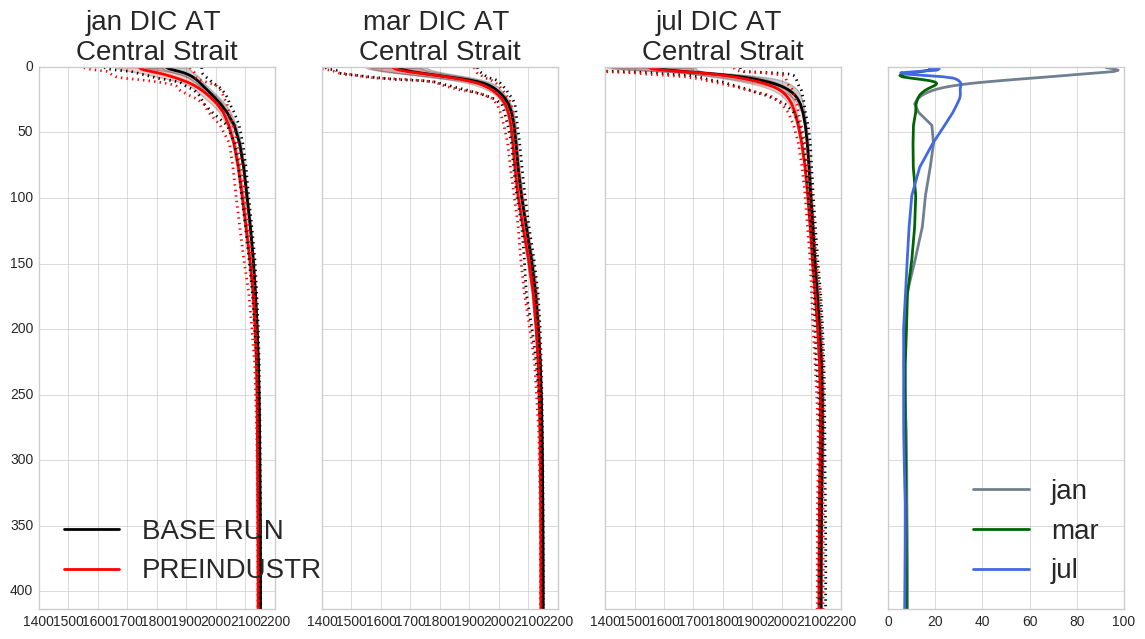

In [20]:
tstn = 'CS'
mon1 = 'jan'
mon2 = 'mar'
mon3 = 'jul'

xmin = 1400
xmax = 2200
ymin = 0
ymax = 414





fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ncname = './pibr/' + mon1 + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
DIC_BR_stor = w['ncoutput']['DIC_BR_stor'][:]
DIC_PI_stor = w['ncoutput']['DIC_PI_stor'][:]
TA_BR_stor = w['ncoutput']['TA_BR_stor'][:]
TA_PI_stor = w['ncoutput']['TA_PI_stor'][:]
temp_BR_stor = w['ncoutput']['temp_BR_stor'][:]
temp_PI_stor = w['ncoutput']['temp_PI_stor'][:]
sal_BR_stor = w['ncoutput']['sal_BR_stor'][:]
sal_PI_stor = w['ncoutput']['sal_PI_stor'][:]

t_stn_DIC_BR = DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
t_stn_DIC_PI = DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

t_stn_DIC_BR_mean = np.zeros(40)
t_stn_DIC_PI_mean = np.zeros(40)
t_stn_DIC_BR_std = np.zeros(40)
t_stn_DIC_PI_std = np.zeros(40)
t_stn_DIC_BR_max = np.zeros(40)
t_stn_DIC_PI_max = np.zeros(40)
t_stn_DIC_BR_min = np.zeros(40)
t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    t_stn_DIC_PI_min[i] = np.nanmin(t_PI)

mon1diff = t_stn_DIC_BR_mean-t_stn_DIC_PI_mean

ax.invert_yaxis()
ax.plot(t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,t_stn_DIC_BR_mean-t_stn_DIC_BR_std,t_stn_DIC_BR_mean+t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax.plot(t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,t_stn_DIC_PI_mean-t_stn_DIC_PI_std,t_stn_DIC_PI_mean+t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax.plot(t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymax,ymin])
ax.set_title(mon1 + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 20, loc = 'best')
#ax2.invert_yaxis()

ncname = './pibr/' + mon2 + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
DIC_BR_stor = w['ncoutput']['DIC_BR_stor'][:]
DIC_PI_stor = w['ncoutput']['DIC_PI_stor'][:]
TA_BR_stor = w['ncoutput']['TA_BR_stor'][:]
TA_PI_stor = w['ncoutput']['TA_PI_stor'][:]
temp_BR_stor = w['ncoutput']['temp_BR_stor'][:]
temp_PI_stor = w['ncoutput']['temp_PI_stor'][:]
sal_BR_stor = w['ncoutput']['sal_BR_stor'][:]
sal_PI_stor = w['ncoutput']['sal_PI_stor'][:]

t_stn_DIC_BR = DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
t_stn_DIC_PI = DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

t_stn_DIC_BR_mean = np.zeros(40)
t_stn_DIC_PI_mean = np.zeros(40)
t_stn_DIC_BR_std = np.zeros(40)
t_stn_DIC_PI_std = np.zeros(40)
t_stn_DIC_BR_max = np.zeros(40)
t_stn_DIC_PI_max = np.zeros(40)
t_stn_DIC_BR_min = np.zeros(40)
t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    t_stn_DIC_PI_min[i] = np.nanmin(t_PI)

mon2diff = t_stn_DIC_BR_mean-t_stn_DIC_PI_mean

ax2.invert_yaxis()
ax2.plot(t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax2.fill_betweenx(prof_depth,t_stn_DIC_BR_mean-t_stn_DIC_BR_std,t_stn_DIC_BR_mean+t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax2.plot(t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax2.fill_betweenx(prof_depth,t_stn_DIC_PI_mean-t_stn_DIC_PI_std,t_stn_DIC_PI_mean+t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax2.plot(t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymax,ymin])
ax2.set_title(mon2 + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax3

ncname = './pibr/' + mon3 + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
DIC_BR_stor = w['ncoutput']['DIC_BR_stor'][:]
DIC_PI_stor = w['ncoutput']['DIC_PI_stor'][:]
TA_BR_stor = w['ncoutput']['TA_BR_stor'][:]
TA_PI_stor = w['ncoutput']['TA_PI_stor'][:]
temp_BR_stor = w['ncoutput']['temp_BR_stor'][:]
temp_PI_stor = w['ncoutput']['temp_PI_stor'][:]
sal_BR_stor = w['ncoutput']['sal_BR_stor'][:]
sal_PI_stor = w['ncoutput']['sal_PI_stor'][:]

t_stn_DIC_BR = DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
t_stn_DIC_PI = DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

t_stn_DIC_BR_mean = np.zeros(40)
t_stn_DIC_PI_mean = np.zeros(40)
t_stn_DIC_BR_std = np.zeros(40)
t_stn_DIC_PI_std = np.zeros(40)
t_stn_DIC_BR_max = np.zeros(40)
t_stn_DIC_PI_max = np.zeros(40)
t_stn_DIC_BR_min = np.zeros(40)
t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    t_stn_DIC_PI_min[i] = np.nanmin(t_PI)

mon3diff = t_stn_DIC_BR_mean-t_stn_DIC_PI_mean

ax3.invert_yaxis()
ax3.plot(t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax3.fill_betweenx(prof_depth,t_stn_DIC_BR_mean-t_stn_DIC_BR_std,t_stn_DIC_BR_mean+t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax3.plot(t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax3.fill_betweenx(prof_depth,t_stn_DIC_PI_mean-t_stn_DIC_PI_std,t_stn_DIC_PI_mean+t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax3.plot(t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymax,ymin])
ax3.set_title(mon3 + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax4.invert_yaxis()
ax4.plot(mon1diff,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = mon1) 
ax4.plot(mon2diff,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = mon2) 
ax4.plot(mon3diff,prof_depth,linewidth = 2, linestyle='-',color = 'royalblue',label = mon3) 

ax4.legend(fontsize =20, loc = 'best')

## shallow plot


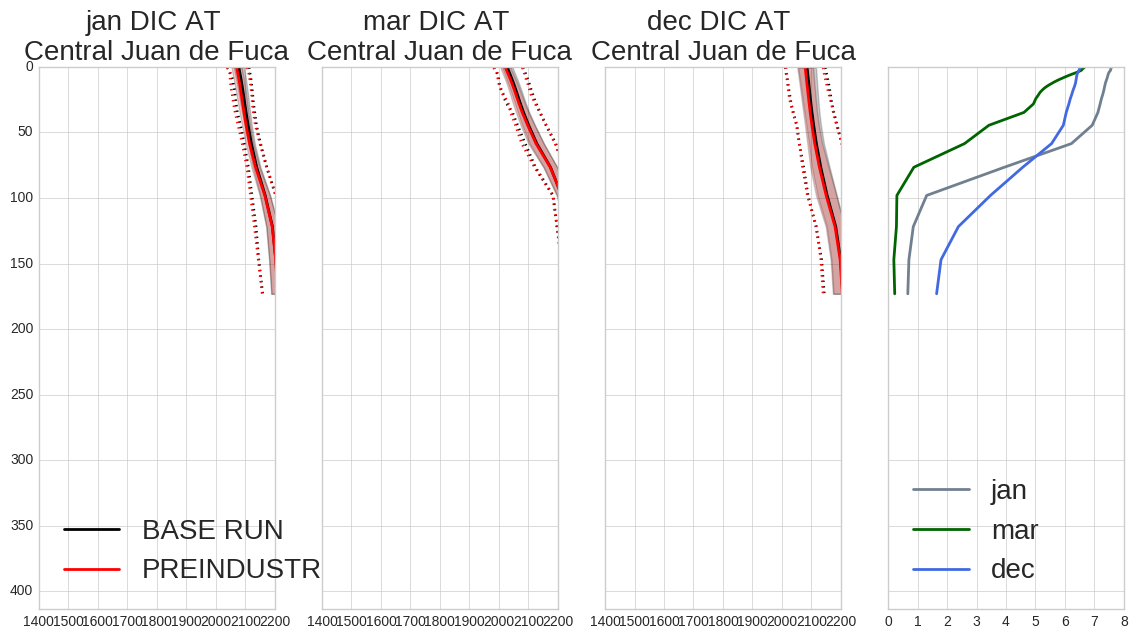

In [21]:
tstn = 'JDFC'
mon1 = 'jan'
mon2 = 'mar'
mon3 = 'dec'

xmin = 1400
xmax = 2200
ymin = 0
ymax = 414





fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ncname = './pibr/' + mon1 + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
DIC_BR_stor = w['ncoutput']['DIC_BR_stor'][:]
DIC_PI_stor = w['ncoutput']['DIC_PI_stor'][:]
TA_BR_stor = w['ncoutput']['TA_BR_stor'][:]
TA_PI_stor = w['ncoutput']['TA_PI_stor'][:]
temp_BR_stor = w['ncoutput']['temp_BR_stor'][:]
temp_PI_stor = w['ncoutput']['temp_PI_stor'][:]
sal_BR_stor = w['ncoutput']['sal_BR_stor'][:]
sal_PI_stor = w['ncoutput']['sal_PI_stor'][:]

t_stn_DIC_BR = DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
t_stn_DIC_PI = DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

t_stn_DIC_BR_mean = np.zeros(40)
t_stn_DIC_PI_mean = np.zeros(40)
t_stn_DIC_BR_std = np.zeros(40)
t_stn_DIC_PI_std = np.zeros(40)
t_stn_DIC_BR_max = np.zeros(40)
t_stn_DIC_PI_max = np.zeros(40)
t_stn_DIC_BR_min = np.zeros(40)
t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    t_stn_DIC_PI_min[i] = np.nanmin(t_PI)

mon1diff = t_stn_DIC_BR_mean-t_stn_DIC_PI_mean

ax.invert_yaxis()
ax.plot(t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,t_stn_DIC_BR_mean-t_stn_DIC_BR_std,t_stn_DIC_BR_mean+t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax.plot(t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,t_stn_DIC_PI_mean-t_stn_DIC_PI_std,t_stn_DIC_PI_mean+t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax.plot(t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymax,ymin])
ax.set_title(mon1 + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 20, loc = 'best')
#ax2.invert_yaxis()

ncname = './pibr/' + mon2 + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
DIC_BR_stor = w['ncoutput']['DIC_BR_stor'][:]
DIC_PI_stor = w['ncoutput']['DIC_PI_stor'][:]
TA_BR_stor = w['ncoutput']['TA_BR_stor'][:]
TA_PI_stor = w['ncoutput']['TA_PI_stor'][:]
temp_BR_stor = w['ncoutput']['temp_BR_stor'][:]
temp_PI_stor = w['ncoutput']['temp_PI_stor'][:]
sal_BR_stor = w['ncoutput']['sal_BR_stor'][:]
sal_PI_stor = w['ncoutput']['sal_PI_stor'][:]

t_stn_DIC_BR = DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
t_stn_DIC_PI = DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

t_stn_DIC_BR_mean = np.zeros(40)
t_stn_DIC_PI_mean = np.zeros(40)
t_stn_DIC_BR_std = np.zeros(40)
t_stn_DIC_PI_std = np.zeros(40)
t_stn_DIC_BR_max = np.zeros(40)
t_stn_DIC_PI_max = np.zeros(40)
t_stn_DIC_BR_min = np.zeros(40)
t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    t_stn_DIC_PI_min[i] = np.nanmin(t_PI)

mon2diff = t_stn_DIC_BR_mean-t_stn_DIC_PI_mean

ax2.invert_yaxis()
ax2.plot(t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax2.fill_betweenx(prof_depth,t_stn_DIC_BR_mean-t_stn_DIC_BR_std,t_stn_DIC_BR_mean+t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax2.plot(t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax2.fill_betweenx(prof_depth,t_stn_DIC_PI_mean-t_stn_DIC_PI_std,t_stn_DIC_PI_mean+t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax2.plot(t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymax,ymin])
ax2.set_title(mon2 + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax3

ncname = './pibr/' + mon3 + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
DIC_BR_stor = w['ncoutput']['DIC_BR_stor'][:]
DIC_PI_stor = w['ncoutput']['DIC_PI_stor'][:]
TA_BR_stor = w['ncoutput']['TA_BR_stor'][:]
TA_PI_stor = w['ncoutput']['TA_PI_stor'][:]
temp_BR_stor = w['ncoutput']['temp_BR_stor'][:]
temp_PI_stor = w['ncoutput']['temp_PI_stor'][:]
sal_BR_stor = w['ncoutput']['sal_BR_stor'][:]
sal_PI_stor = w['ncoutput']['sal_PI_stor'][:]

t_stn_DIC_BR = DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
t_stn_DIC_PI = DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

t_stn_DIC_BR_mean = np.zeros(40)
t_stn_DIC_PI_mean = np.zeros(40)
t_stn_DIC_BR_std = np.zeros(40)
t_stn_DIC_PI_std = np.zeros(40)
t_stn_DIC_BR_max = np.zeros(40)
t_stn_DIC_PI_max = np.zeros(40)
t_stn_DIC_BR_min = np.zeros(40)
t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    t_stn_DIC_PI_min[i] = np.nanmin(t_PI)

mon3diff = t_stn_DIC_BR_mean-t_stn_DIC_PI_mean

ax3.invert_yaxis()
ax3.plot(t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax3.fill_betweenx(prof_depth,t_stn_DIC_BR_mean-t_stn_DIC_BR_std,t_stn_DIC_BR_mean+t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax3.plot(t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax3.fill_betweenx(prof_depth,t_stn_DIC_PI_mean-t_stn_DIC_PI_std,t_stn_DIC_PI_mean+t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax3.plot(t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymax,ymin])
ax3.set_title(mon3 + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax4.invert_yaxis()
ax4.plot(mon1diff,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = mon1) 
ax4.plot(mon2diff,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = mon2) 
ax4.plot(mon3diff,prof_depth,linewidth = 2, linestyle='-',color = 'royalblue',label = mon3) 

ax4.legend(fontsize =20, loc = 'best')

## shallow plot


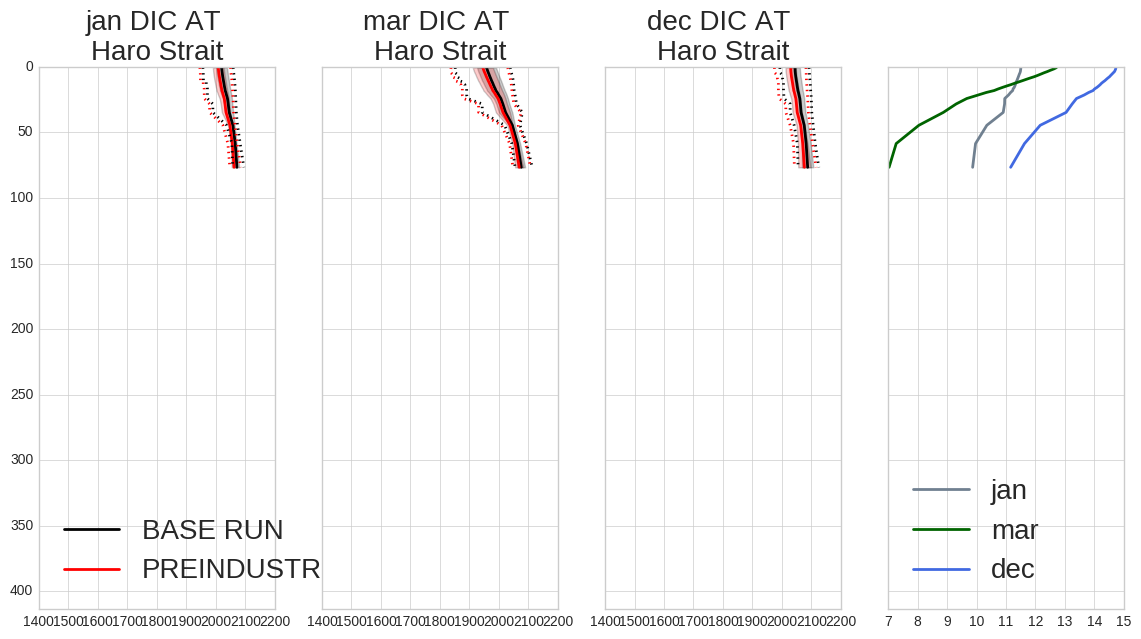

In [22]:
tstn = 'HS'
mon1 = 'jan'
mon2 = 'mar'
mon3 = 'dec'

xmin = 1400
xmax = 2200
ymin = 0
ymax = 414





fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ncname = './pibr/' + mon1 + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
DIC_BR_stor = w['ncoutput']['DIC_BR_stor'][:]
DIC_PI_stor = w['ncoutput']['DIC_PI_stor'][:]
TA_BR_stor = w['ncoutput']['TA_BR_stor'][:]
TA_PI_stor = w['ncoutput']['TA_PI_stor'][:]
temp_BR_stor = w['ncoutput']['temp_BR_stor'][:]
temp_PI_stor = w['ncoutput']['temp_PI_stor'][:]
sal_BR_stor = w['ncoutput']['sal_BR_stor'][:]
sal_PI_stor = w['ncoutput']['sal_PI_stor'][:]

t_stn_DIC_BR = DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
t_stn_DIC_PI = DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

t_stn_DIC_BR_mean = np.zeros(40)
t_stn_DIC_PI_mean = np.zeros(40)
t_stn_DIC_BR_std = np.zeros(40)
t_stn_DIC_PI_std = np.zeros(40)
t_stn_DIC_BR_max = np.zeros(40)
t_stn_DIC_PI_max = np.zeros(40)
t_stn_DIC_BR_min = np.zeros(40)
t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    t_stn_DIC_PI_min[i] = np.nanmin(t_PI)

mon1diff = t_stn_DIC_BR_mean-t_stn_DIC_PI_mean

ax.invert_yaxis()
ax.plot(t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax.fill_betweenx(prof_depth,t_stn_DIC_BR_mean-t_stn_DIC_BR_std,t_stn_DIC_BR_mean+t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax.plot(t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax.fill_betweenx(prof_depth,t_stn_DIC_PI_mean-t_stn_DIC_PI_std,t_stn_DIC_PI_mean+t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax.plot(t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax.plot(t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.plot(t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymax,ymin])
ax.set_title(mon1 + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)
ax.legend(fontsize = 20, loc = 'best')
#ax2.invert_yaxis()

ncname = './pibr/' + mon2 + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
DIC_BR_stor = w['ncoutput']['DIC_BR_stor'][:]
DIC_PI_stor = w['ncoutput']['DIC_PI_stor'][:]
TA_BR_stor = w['ncoutput']['TA_BR_stor'][:]
TA_PI_stor = w['ncoutput']['TA_PI_stor'][:]
temp_BR_stor = w['ncoutput']['temp_BR_stor'][:]
temp_PI_stor = w['ncoutput']['temp_PI_stor'][:]
sal_BR_stor = w['ncoutput']['sal_BR_stor'][:]
sal_PI_stor = w['ncoutput']['sal_PI_stor'][:]

t_stn_DIC_BR = DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
t_stn_DIC_PI = DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

t_stn_DIC_BR_mean = np.zeros(40)
t_stn_DIC_PI_mean = np.zeros(40)
t_stn_DIC_BR_std = np.zeros(40)
t_stn_DIC_PI_std = np.zeros(40)
t_stn_DIC_BR_max = np.zeros(40)
t_stn_DIC_PI_max = np.zeros(40)
t_stn_DIC_BR_min = np.zeros(40)
t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    t_stn_DIC_PI_min[i] = np.nanmin(t_PI)

mon2diff = t_stn_DIC_BR_mean-t_stn_DIC_PI_mean

ax2.invert_yaxis()
ax2.plot(t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax2.fill_betweenx(prof_depth,t_stn_DIC_BR_mean-t_stn_DIC_BR_std,t_stn_DIC_BR_mean+t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax2.plot(t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax2.fill_betweenx(prof_depth,t_stn_DIC_PI_mean-t_stn_DIC_PI_std,t_stn_DIC_PI_mean+t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax2.plot(t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax2.plot(t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.plot(t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([ymax,ymin])
ax2.set_title(mon2 + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax3

ncname = './pibr/' + mon3 + '_stored_PI_BR_output.nc'
w = nc.Dataset(ncname)
DIC_BR_stor = w['ncoutput']['DIC_BR_stor'][:]
DIC_PI_stor = w['ncoutput']['DIC_PI_stor'][:]
TA_BR_stor = w['ncoutput']['TA_BR_stor'][:]
TA_PI_stor = w['ncoutput']['TA_PI_stor'][:]
temp_BR_stor = w['ncoutput']['temp_BR_stor'][:]
temp_PI_stor = w['ncoutput']['temp_PI_stor'][:]
sal_BR_stor = w['ncoutput']['sal_BR_stor'][:]
sal_PI_stor = w['ncoutput']['sal_PI_stor'][:]

t_stn_DIC_BR = DIC_BR_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]
t_stn_DIC_PI = DIC_PI_stor[:,:,cs.STATIONS[tstn]['y']:cs.STATIONS[tstn]['y']+20,cs.STATIONS[tstn]['x']:cs.STATIONS[tstn]['x']+20]

t_stn_DIC_BR_mean = np.zeros(40)
t_stn_DIC_PI_mean = np.zeros(40)
t_stn_DIC_BR_std = np.zeros(40)
t_stn_DIC_PI_std = np.zeros(40)
t_stn_DIC_BR_max = np.zeros(40)
t_stn_DIC_PI_max = np.zeros(40)
t_stn_DIC_BR_min = np.zeros(40)
t_stn_DIC_PI_min = np.zeros(40)
for i in range(0,40):
    t_BR = np.ravel(t_stn_DIC_BR[:,i,:,:])
    t_PI = np.ravel(t_stn_DIC_PI[:,i,:,:])
    t_BR[t_BR ==0] = np.nan
    t_PI[t_PI ==0] = np.nan
    t_stn_DIC_BR_mean[i] = np.nanmean(t_BR)
    t_stn_DIC_PI_mean[i] = np.nanmean(t_PI)
    t_stn_DIC_BR_std[i] = np.nanstd(t_BR)
    t_stn_DIC_PI_std[i] = np.nanstd(t_PI)
    t_stn_DIC_BR_max[i] = np.nanmax(t_BR)
    t_stn_DIC_PI_max[i] = np.nanmax(t_PI)
    t_stn_DIC_BR_min[i] = np.nanmin(t_BR)
    t_stn_DIC_PI_min[i] = np.nanmin(t_PI)

mon3diff = t_stn_DIC_BR_mean-t_stn_DIC_PI_mean

ax3.invert_yaxis()
ax3.plot(t_stn_DIC_BR_mean,prof_depth,linewidth = 2, linestyle='-',color = 'k', label = 'BASE RUN') 
ax3.fill_betweenx(prof_depth,t_stn_DIC_BR_mean-t_stn_DIC_BR_std,t_stn_DIC_BR_mean+t_stn_DIC_BR_std,facecolor='k', alpha = 0.2) 
ax3.plot(t_stn_DIC_PI_mean,prof_depth,linewidth = 2, linestyle='-',color = 'r', label = 'PREINDUSTRIAL') 
ax3.fill_betweenx(prof_depth,t_stn_DIC_PI_mean-t_stn_DIC_PI_std,t_stn_DIC_PI_mean+t_stn_DIC_PI_std,facecolor='r', alpha = 0.2) 
ax3.plot(t_stn_DIC_BR_min,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(t_stn_DIC_BR_max,prof_depth,linewidth = 2, linestyle = ':',color = 'k')
ax3.plot(t_stn_DIC_PI_max,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.plot(t_stn_DIC_PI_min,prof_depth,linewidth = 2, linestyle = ':',color = 'r')
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymax,ymin])
ax3.set_title(mon3 + ' DIC AT \n'+cs.STATIONS[tstn]['fullname'], fontsize = 20)

#ax4.invert_yaxis()
ax4.plot(mon1diff,prof_depth,linewidth = 2, linestyle='-',color = 'slategrey',label = mon1) 
ax4.plot(mon2diff,prof_depth,linewidth = 2, linestyle='-',color = 'darkgreen',label = mon2) 
ax4.plot(mon3diff,prof_depth,linewidth = 2, linestyle='-',color = 'royalblue',label = mon3) 

ax4.legend(fontsize =20, loc = 'best')

## shallow plot


In [35]:
#Can you try temperature of -5.5, 
#salinity of 25. DIC = 1070.5, TA = 1103.5


ttera_is = -5.001
tsra_psu = 25
ttara = 1103.5 * 1e-3
tdra = 1070.5 * 1e-3
tzero = 0
tpressure = 0
tdepth = 0 
response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                   sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

print('sal is: '+ str(tsra_psu))
print('temp is: '+ str(ttera_is))
print('pH is: '+ str(pH))
print('pco2 is: '+ str(pco2))

sal is: 25
temp is: -5.001
pH is: [-19.57087125]
pco2 is: [24403.1891478]
